In [186]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [250]:
p = np.linspace(0, 1, 1000)

In [251]:
# FullSimplify[D[1/(1+Exp[(Log[(1-p)/p]+x)/t]),p]]
# -> -(((1/p-1)^(1/t)*E^(x/t))/((p-1)*p*t*((1/p-1)^(1/t)*E^(x/t)+1)^2))
#    this is A
# then, fix t=...
# B = Exp[-x] / (1 + Exp[-x])^2 (Logistic density)
# then Integrate[A * B, {x,-Infinity, Infinity}]
# and  Integrate[A^2 * B, {x,-Infinity, Infinity}]
# >>> s.replace("Sqrt[", "np.sqrt(").replace("Pi", "np.pi").replace("ArcTan[", "np.arctan(").replace("Log[", "np.log(").replace("]", ")").replace("^", "**").replace("Abs[", "np.abs(").replace("ArcTanh[", "np.arctanh(")

In [252]:
np.mean(get_gradient(p=0.5, tau=1, n_samples=1000000))

0.6663581392127359

In [253]:
def get_gradient(p, tau=2.0, n_samples=10000):
    delta = np.random.logistic(size=n_samples)
    t = tau
#     return 1 / (1 + np.exp((delta + np.log((1 - p) / p))/tau))
    x = delta
    return -((np.e**(x/t)*(-1+1/p)**(1/t))/((1+np.e**(x/t)*(-1+1/p)**(1/t))**2*(-1+p)*p*t))

In [254]:
e_grads = {}
var_grads = {}

# tau = 0.5
expected_grad = -((-((1-5*p+4*p**2+8*p**3-12*p**4+4*p**5)*np.abs(p)*np.arctan(np.abs(-1+p)/p))+p*np.abs(-1+p)*((1-3*p+2*p**2)*np.abs(p)+(-1+4*p-8*p**3+4*p**4)*np.arctan(p/(1-p))+(-1+p)*p*(5-10*p+8*p**2+(-2+4*p)*np.log((-1+p)**2)+(2-4*p)*np.log(p**2))))/(p*(1-2*p+2*p**2)**3*np.abs(-1+p)))
expected_grad_squared = (-3*(-1+8*p-48*p**2+176*p**3-280*p**4+96*p**5+192*p**6-192*p**7+48*p**8)*np.arctan((-1+p)/p)-3*(-1+8*p-48*p**2+176*p**3-280*p**4+96*p**5+192*p**6-192*p**7+48*p**8)*np.arctan(p/(-1+p))+16*(-1+p)*p*(-1+6*p-6*p**2-16*p**3+48*p**4-48*p**5+16*p**6+6*(-1+p)**2*p**2*(-1+2*p)*np.log((-1+p)**2)-12*(-1+p)**2*p**2*(-1+2*p)*np.log(p)))/(12*(-1+p)*p*(1-2*p+2*p**2)**5)

variance_grad = expected_grad_squared - expected_grad ** 2
e_grads[0.5] = expected_grad
var_grads[0.5] = variance_grad

# tau = 1
expected_grad = (2-4*p+np.log(p/(1-p)))/(-1+2*p)**3
expected_grad_squared = (1+2*p*(3+4*p*(-3+2*p))+6*(-1+p)*p*(np.log(1-p)+np.log(1/p)))/(3*(-1+p)*p*(-1+2*p)**5)
variance_grad = expected_grad_squared - expected_grad ** 2

e_grads[1.0] = expected_grad
var_grads[1.0] = variance_grad

# tau = 2
# diverges in Mathematica...!
exps_ = []
vars_ = []
for p_ in tqdm(p):
    exps_.append(np.mean(get_gradient(p=p_, tau=2.0, n_samples=10000)))
    vars_.append(np.std(get_gradient(p=p_, tau=2.0, n_samples=10000)) **2)
e_grads[2.0] = exps_
var_grads[2.0] = vars_

# variance_grad = expected_grad_squared - expected_grad ** 2
# e_grads[2.0] = expected_grad
# var_grads[2.0] = variance_grad

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/sergei/miniconda3/lib/pytho

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [255]:
plt.rcParams.update({
    #'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family' : 'normal',
        'font.weight' : 'normal',
        'font.size'   : 20
})


In [256]:
assert e_grads.keys() == var_grads.keys()

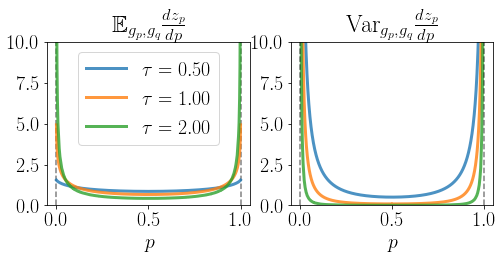

In [258]:
taus = sorted(e_grads.keys())

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title("$\mathbb E_{g_p,g_q}\\frac{dz_p}{dp}$")
plt.axvline(0, ls='--', c='black', alpha=0.5)
plt.axvline(1, ls='--', c='black', alpha=0.5)
for tau in taus:
    plt.plot(p, e_grads[tau], label="$\\tau=%.2f$" % tau, linewidth=3.0, alpha=0.8)
plt.legend()
#plt.axhline(1, ls='--')
plt.xlabel('$p$')
plt.ylim((0, 10))
plt.subplot(1, 2, 2)
plt.title("$\mbox{Var}_{g_p,g_q}\\frac{dz_p}{dp}$")
for tau in taus:
    plt.plot(p, var_grads[tau], label="$\\tau=%.2f$" % tau, alpha=0.8, linewidth=3.0)
# plt.legend()
plt.axvline(0, ls='--', c='black', alpha=0.5)
plt.axvline(1, ls='--', c='black', alpha=0.5)
plt.xlabel('$p$')
plt.ylim((0, 10))
# plt.subplot(1, 3, 3)
# plt.title("$\mbox{Var}_{g_p,g_q}\\frac{dz_p}{dp}$")
# for tau in taus:
#     means = e_grads[tau]
#     vars_ = var_grads[tau]
#     plt.plot(p, e_grads[tau], label="$\\tau=%.2f$" % tau, linewidth=3.0, alpha=0.8)
#     plt.fill_between(p, np.array(means) - vars_, np.array(means) + vars_)#, label="$\\tau=%.2f$" % tau, alpha=0.8, linewidth=3.0)
# # plt.legend()
# plt.axvline(0, ls='--', c='black', alpha=0.5)
# plt.axvline(1, ls='--', c='black', alpha=0.5)
# plt.xlabel('$p$')
# plt.ylim((0, 10))

plt.savefig('plot_gumbel_gradient.pdf', bbox_inches='tight')
plt.show()

In [259]:
e_grads[0.5][int(len(p) * 0.3)]

0.9057196447153095

In [ ]:
np.mean(get_gradient(p=0.3, tau=0.5, n_samples=10000000))

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


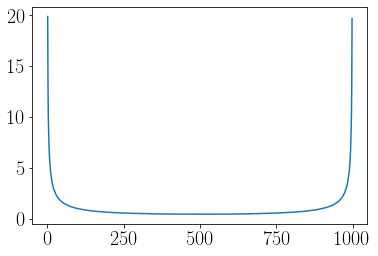

In [206]:
plt.plot(exps_)
# plt.plot(vars_)